# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

In [1]:
import numpy as np
import math
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

## Part1: K Means

In [2]:
#implement elbow method from scratch

def get_avg_dist(X,pred,centre):
    
    centre_of_point = np.array(list(map(lambda x: centre[x],pred)))
    dist = np.sqrt(np.sum(np.square(centre_of_point - X),axis=1))
    return np.sum(dist)/X.shape[0]

def elbow(X,preds,centres):
    avg_distances = []
    for pred,centre in zip(preds,centres):
        
        avg_distances.append(get_avg_dist(X,pred,centre))
    return avg_distances
    

In [3]:
#implement silhouette method from scratch


def silhouette(X,preds,ks):
    scores = [silhouette_score(X,pred) for pred in preds]
    plt.plot(ks,scores,marker='o')

    


In [2]:
# LOADING THE DATASET. Take only the test split (10000 samples)
# from keras.datasets import fashion_mnist
import numpy as np

# (trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# X = testX.reshape(testX.shape[0] , -1)
# y = np.copy(testy)
import pandas as pd

df = pd.read_csv("./fashion-mnist_test.csv")


df.head()
# print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = np.array(df.iloc[:,1:785])

In [4]:
y = np.array(df.label)

In [7]:
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


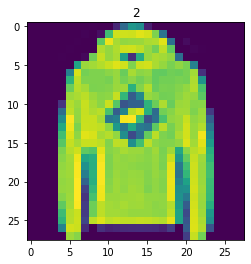

In [8]:
image_idx = 1000
plt.imshow(X[image_idx].reshape(28,28), interpolation='nearest')
plt.title(y[image_idx])
plt.show()


In [9]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)



def kmeans(k,init):
    km = KMeans(n_clusters=k,n_init=1,init=init).fit(X)
    centre = km.cluster_centers_
    pred = km.predict(X)
    return (centre,pred)


def apply_kmeans(ks,init='k-means++'):

    centres = []
    preds = []
    
    for k in ks:
        c,p = kmeans(k,init)
        centres.append(c)
        preds.append(p)
        print(f"Cluster {k} completed")

    return preds,centres




In [10]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)

Cluster 2 completed
Cluster 3 completed
Cluster 4 completed
Cluster 5 completed
Cluster 6 completed
Cluster 7 completed
Cluster 8 completed
Cluster 9 completed
Cluster 10 completed
Cluster 11 completed
Cluster 12 completed
Cluster 13 completed
Cluster 14 completed
Cluster 15 completed
Cluster 16 completed
Cluster 17 completed
Cluster 18 completed
Cluster 19 completed
Cluster 20 completed
Cluster 21 completed
Cluster 22 completed
Cluster 23 completed
Cluster 24 completed
Cluster 25 completed
Cluster 26 completed
Cluster 27 completed
Cluster 28 completed
Cluster 29 completed
Cluster 30 completed


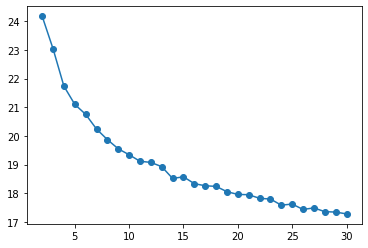

In [11]:
ks = list(range(2,31))
preds,centres = apply_kmeans(ks)
avg_distances = elbow(X,preds,centres)
plt.plot(ks,avg_distances,marker='o',linestyle='solid')

According to elbow method, optimal number of clusters is 10

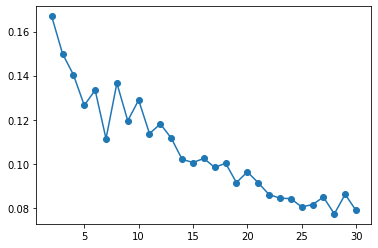

In [12]:
silhouette(X,preds,ks)

According to silhouette method, optimal number of clusters is 2

In [13]:
#let's compare kmeans++ with random

preds,centres = apply_kmeans(ks,init='random')
avg_distances_random = elbow(X,preds,centres)

Cluster 2 completed
Cluster 3 completed
Cluster 4 completed
Cluster 5 completed
Cluster 6 completed
Cluster 7 completed
Cluster 8 completed
Cluster 9 completed
Cluster 10 completed
Cluster 11 completed
Cluster 12 completed
Cluster 13 completed
Cluster 14 completed
Cluster 15 completed
Cluster 16 completed
Cluster 17 completed
Cluster 18 completed
Cluster 19 completed
Cluster 20 completed
Cluster 21 completed
Cluster 22 completed
Cluster 23 completed
Cluster 24 completed
Cluster 25 completed
Cluster 26 completed
Cluster 27 completed
Cluster 28 completed
Cluster 29 completed
Cluster 30 completed


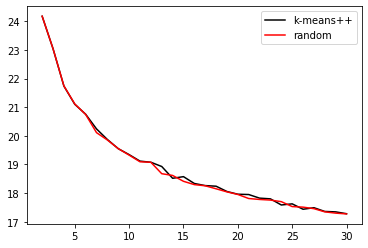

In [14]:
plt.plot(ks,avg_distances,color='black')
plt.plot(ks,avg_distances_random,color='red')
plt.legend(["k-means++","random"])

Not much difference for this dataset

In [15]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)

In [16]:
X_.shape

(10000, 2)

In [17]:
tab10 = plt.get_cmap('tab10')

In [18]:
colormap = [tab10(i) for i in range(10)]
colormap = np.array(colormap)

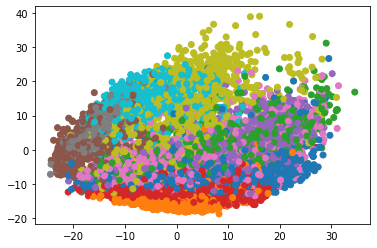

In [19]:
plt.scatter(X_[:,0],X_[:,1],c=colormap[y])

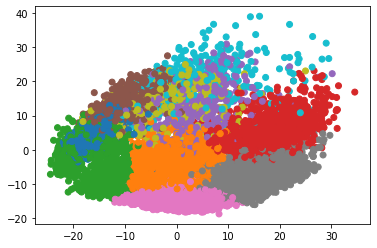

In [20]:
plt.scatter(X_[:,0],X_[:,1],c=colormap[preds[8]])

## Part2: Hierarchical clustering

In [5]:
# implement hierarchical clustering ( you can use scikit module)


def hierarchical_clustering(data,type='ward'):
    return linkage(data, method=type, metric='euclidean')
    
    

In [18]:
model = hierarchical_clustering(X)

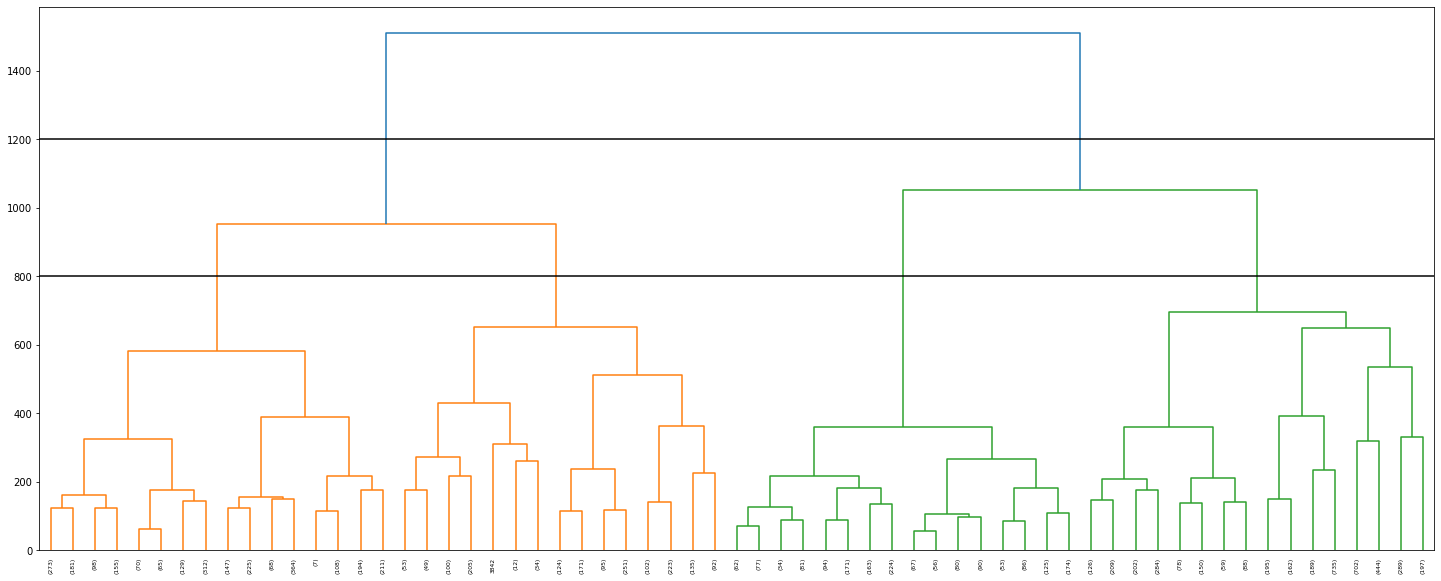

In [19]:
# visualize dendogram
plt.figure(figsize=(25,10))
dendrogram(model,truncate_mode='level',p=5)
plt.axhline(y=800,color='black')
plt.axhline(y=1200,color='black')

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: Dendrogram is a visual method to find the number of clusters. If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters. More is the distance between the clusters, better they are separated. We draw horizontal lines and number of clusters is equal to number of vertical lines it cuts. Please note that there is not definite way to find optimal number of clusters from dendrogram. 



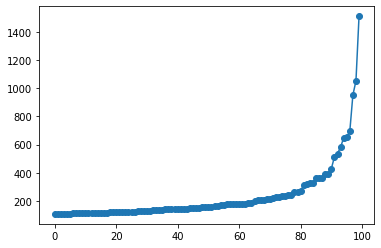

In [31]:
plt.plot(model[:,2][-100:],marker='o',linestyle='solid')

Here we can see, change in the distance is very for last three merges.We can conclude there are potential 2 or 4 clusters.

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [30.0, 30.0, 66.25, 66.25],
  [15.0, 15.0, 48.125, 48.125],
  [5.0, 5.0, 31.5625, 31.5625]],
 'dcoord': [[0.0, 73.46976244478363, 73.46976244478363, 0.0],
  [0.0, 72.18558339689461, 72.18558339689461, 0.0],
  [0.0, 74.7854080305195, 74.7854080305195, 72.18558339689461],
  [0.0, 89.60878745964185, 89.60878745964185, 0.0],
  [74.7854080305195, 92.87263307224761, 92.87263307224761, 89.60878745964185],
  [73.46976244478363,
   108.65850455963316,
   108.65850455963316,
   92.87263307224761],
  [0.0, 120.9013631152743, 120.9013631152743, 108.65850455963316],
  [0.0, 173.85491366176984, 173.85491366176984, 120.9013631152743]],
 'ivl': ['3842',
  '4451',
  '8345',
  '9969',
  '4601',
  '(3)',
  '(9990)',
  '1026',
  '5201'],
 'leaves': [3842, 4451, 8345, 9969, 4601, 19989, 19990, 1026, 5201],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C1',

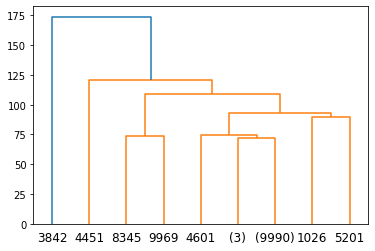

In [24]:
#visualisation of clusters using single linkage and complete linkage


model = hierarchical_clustering(X,type='single')

dendrogram(model,truncate_mode='level',p=5)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [80.0, 80.0, 120.0, 120.0],
  [55.0, 55.0, 100.0, 100.0],
  [30.0, 30.0, 77.5, 77.5],
  [5.0, 5.0, 53.75, 53.75]],
 'dcoord': [[0.0, 73.46976244478363, 73.46976244478363, 0.0],
  [0.0, 89.60878745964185, 89.60878745964185, 0.0],
  [73.46976244478363,
   144.09492081734396,
   144.09492081734396,
   89.60878745964185],
  [0.0, 85.96926898752938, 85.96926898752938, 0.0],
  [0.0, 92.31304105178052, 92.31304105178052, 0.0],
  [85.96926898752938,
   112.38892126934348,
   112.38892126934348,
   92.31304105178052],
  [0.0, 119.24212165878797, 119.24212165878797, 0.0],
  [0.0, 120.73526080316982, 120.73526080316982, 0.0],
  [119.24212165878797,
   132.55201314929351,
   132.55201314929351,
   120.73526080316982],
  [112.3

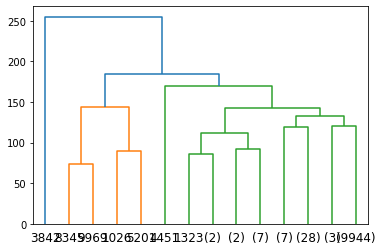

In [25]:
model = hierarchical_clustering(X,type='complete')

dendrogram(model,truncate_mode='level',p=5)

**Question:** Mention the differences observed using single and complete linkage:

Answer: Single linkage and complete linkage are two common approaches for hierarchical clustering that differ in the way they measure the distance between clusters.

In single linkage, the distance between two clusters is defined as the shortest distance between any two points in the two clusters. This can lead to the formation of long chains of clusters, known as "stringy clusters," which can be problematic for certain datasets.

In contrast, in complete linkage, the distance between two clusters is defined as the maximum distance between any two points in the two clusters. This tends to produce compact, spherical clusters, but can also result in the merging of clusters that are not particularly similar.

## Part3: Image Compression

In [26]:
# Boiler plate code
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [27]:
img.shape

(635, 640, 3)

In [28]:
X.shape

(406400, 3)

In [29]:
def reduction(N,k):
    original = 24*N
    reduced = 24*k + N*math.log2(k)
    return ((original-reduced)/original)*100

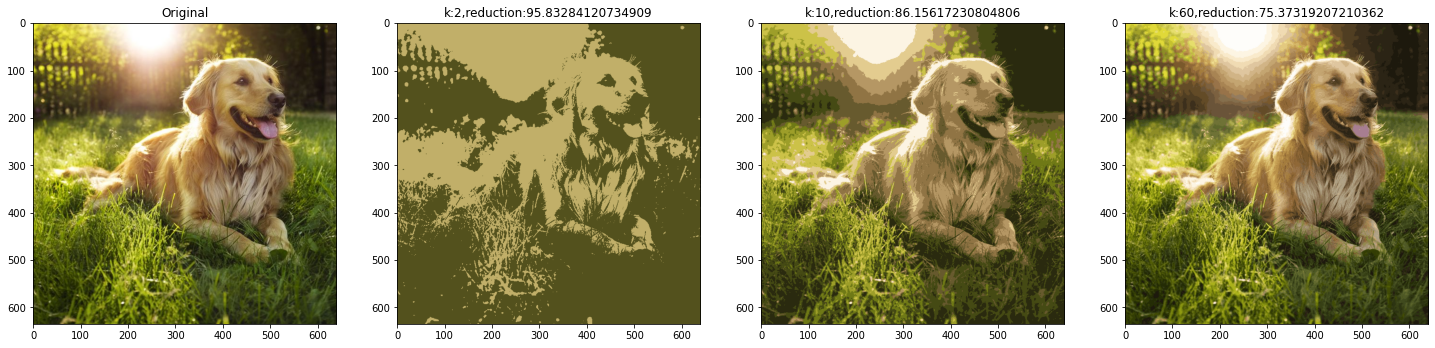

In [30]:
ks = [2,10,60]
fig,axes = plt.subplots(1,4,figsize=(25,10))
axes[0].imshow(img)
axes[0].set_title("Original")
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k,n_init=1)
    kmeans.fit(X)
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.floor(compressed_image)
    compressed_image = compressed_image.astype('int')
    axes[i+1].imshow(compressed_image.reshape(img.shape))
    axes[i+1].set_title(f"k:{k},reduction:{reduction(X.shape[0],k)}")